# Student academic stress real world dataset

## API dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("poushal02/student-academic-stress-real-world-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-academic-stress-real-world-dataset


# EDA
## Data Information


#### Import Library

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    accuracy_score, classification_report,
    confusion_matrix, f1_score, precision_score, recall_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [ ]:
# Cek isi folder hasil download
print(os.listdir(path))



['academic Stress level - maintainance 1.csv']


In [ ]:
# Misalnya dataset utama bernama "Student Stress.csv"
data = pd.read_csv(os.path.join(path, "academic Stress level - maintainance 1.csv"))

In [ ]:
data.head(10)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5
5,24/07/2025 22:08:13,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,4
6,24/07/2025 22:09:21,undergraduate,5,5,disrupted,Emotional breakdown (crying a lot),No,4,4
7,24/07/2025 22:10:06,undergraduate,3,2,Peaceful,"Social support (friends, family)",No,3,3
8,24/07/2025 22:11:01,undergraduate,2,2,Peaceful,Analyze the situation and handle it with intel...,No,2,2
9,24/07/2025 22:11:19,undergraduate,2,2,Peaceful,Analyze the situation and handle it with intel...,No,4,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [ ]:
data.isnull().sum()

,0
Timestamp,0
Your Academic Stage,0
Peer pressure,0
Academic pressure from your home,0
Study Environment,1
What coping strategy you use as a student?,0
"Do you have any bad habits like smoking, drinking on a daily basis?",0
What would you rate the academic competition in your student life,0
Rate your academic stress index,0


In [ ]:
#drop baris data yang hilang
data.dropna(subset=["Study Environment"], inplace=True)

#Drop kolom timestamp
data = data.drop(columns=['Timestamp'])

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
135,True
136,False
137,False
138,False


In [ ]:
data[data.duplicated(keep=False)]


,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
1,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
3,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
20,undergraduate,4,3,Peaceful,Analyze the situation and handle it with intel...,No,4,4
21,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,3
22,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,3
25,undergraduate,4,3,Peaceful,Analyze the situation and handle it with intel...,No,4,4
45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
50,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,3
71,undergraduate,3,3,disrupted,Analyze the situation and handle it with intel...,No,4,4
73,undergraduate,3,3,disrupted,Analyze the situation and handle it with intel...,No,4,4


In [ ]:
data = data.drop_duplicates()

In [ ]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

Your Academic Stage: 3 unique values
Peer pressure: 5 unique values
Academic pressure from your home: 5 unique values
Study Environment: 3 unique values
What coping strategy you use as a student?: 3 unique values
Do you have any bad habits like smoking, drinking on a daily basis?: 3 unique values
What would you rate the academic  competition in your student life: 5 unique values
Rate your academic stress index : 5 unique values


In [ ]:
#Melihat nilai unik pada setiap kolom
print(data['Your Academic Stage'].unique())
print(data['Peer pressure'].unique())
print(data['Academic pressure from your home'].unique())
print(data['Study Environment'].unique())
print(data['What coping strategy you use as a student?'].unique())
print(data['Do you have any bad habits like smoking, drinking on a daily basis?'].unique())
print(data['What would you rate the academic  competition in your student life'].unique())
print(data['Rate your academic stress index '].unique())


['undergraduate' 'high school' 'post-graduate']
[4 3 1 5 2]
[5 4 1 2 3]
['Noisy' 'Peaceful' 'disrupted']
['Analyze the situation and handle it with intellect'
 'Social support (friends, family)' 'Emotional breakdown (crying a lot)']
['No' 'prefer not to say' 'Yes']
[3 2 4 5 1]
[5 3 4 2 1]


In [ ]:
print(data.describe())
print("\n")

       Peer pressure  Academic pressure from your home  \
count     131.000000                        131.000000   
mean        3.053435                          3.183206   
std         1.104626                          1.299713   
min         1.000000                          1.000000   
25%         2.000000                          2.000000   
50%         3.000000                          3.000000   
75%         4.000000                          4.000000   
max         5.000000                          5.000000   

       What would you rate the academic  competition in your student life  \
count                                         131.000000                    
mean                                            3.473282                    
std                                             1.047548                    
min                                             1.000000                    
25%                                             3.000000                    
50%            

### Visualisasi Penyebaran Nilai di setiap kolom

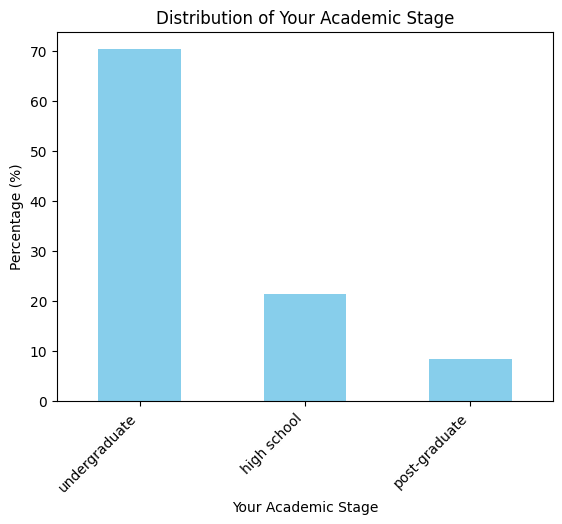

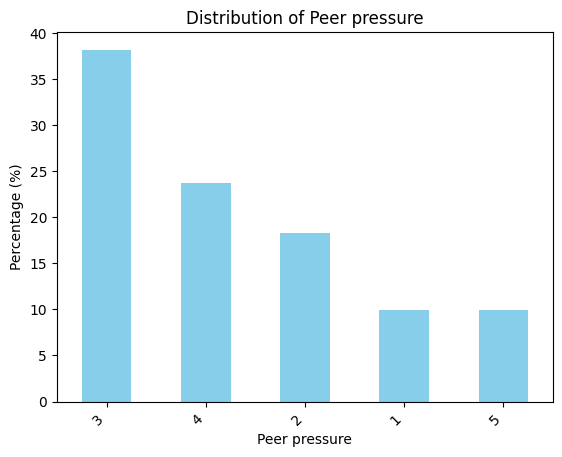

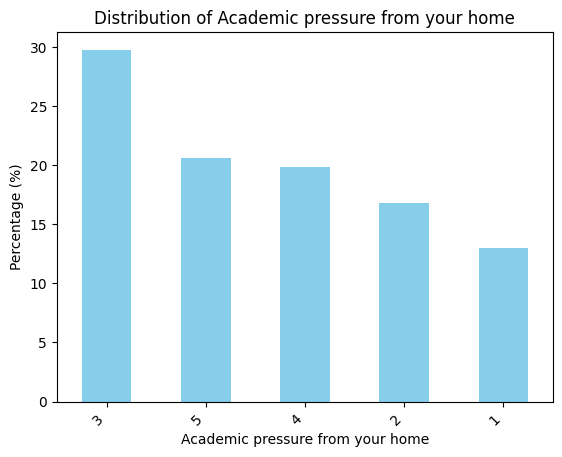

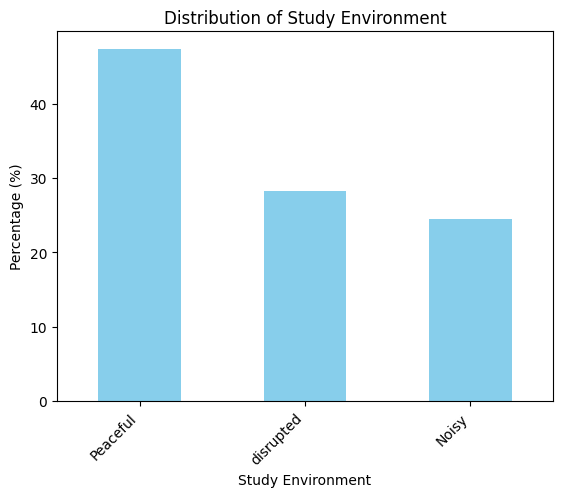

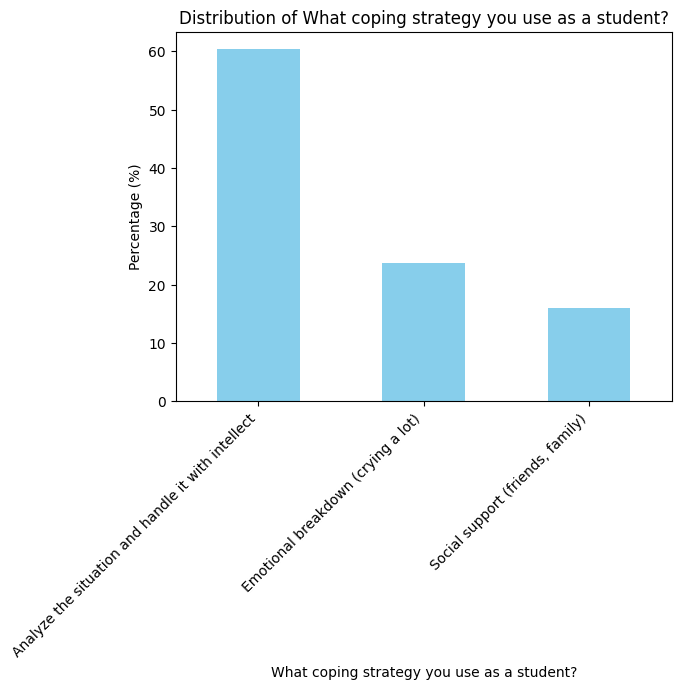

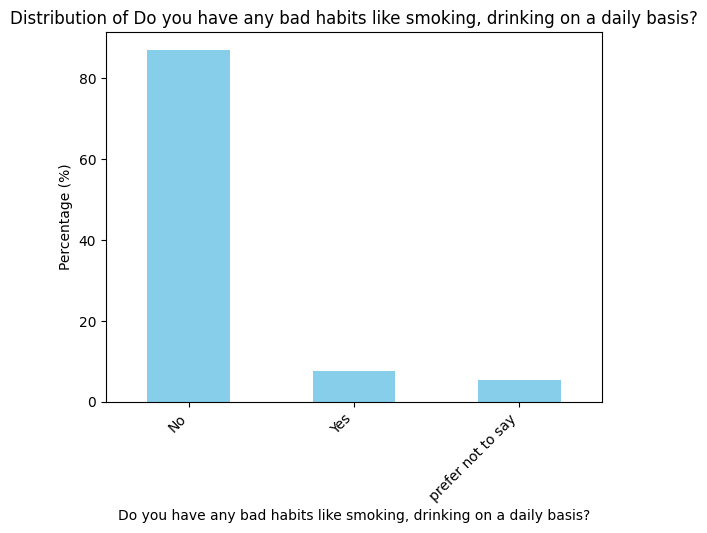

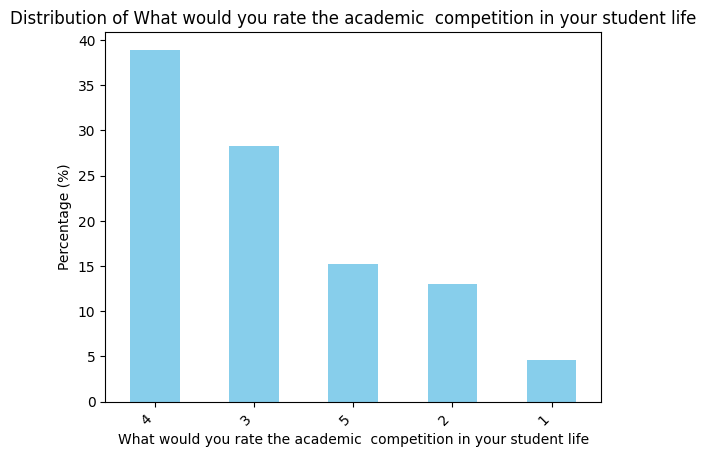

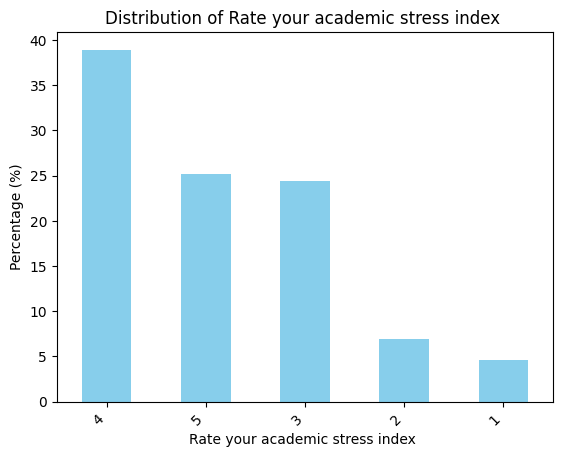

In [ ]:
categorical_cols = [
    'Your Academic Stage',
    'Peer pressure',
    'Academic pressure from your home',
    'Study Environment',
    'What coping strategy you use as a student?',
    'Do you have any bad habits like smoking, drinking on a daily basis?',
    'What would you rate the academic  competition in your student life',
    'Rate your academic stress index '
]

for col in categorical_cols:
    counts = data[col].value_counts(normalize=True) * 100
    counts.plot(kind='bar', color='skyblue')
    plt.ylabel("Percentage (%)")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.show()


Data sangat tidak seimbang untuk penyebaran kelas 1-5 academic stress. Dimana level 1-2 memiliki data yang sangat sedikit

### Encoding

In [ ]:
label_cols = ["Your Academic Stage", "Do you have any bad habits like smoking, drinking on a daily basis?"]
le = LabelEncoder()
for col in label_cols:
    data[col]= le.fit_transform(data[col])


In [ ]:
data = pd.get_dummies(data, columns=['Study Environment',
                                'What coping strategy you use as a student?'])


In [ ]:
#mengecek seluruh type data
print(data.dtypes)


Your Academic Stage                                                                              int64
Peer pressure                                                                                    int64
Academic pressure from your home                                                                 int64
Do you have any bad habits like smoking, drinking on a daily basis?                              int64
What would you rate the academic  competition in your student life                               int64
Rate your academic stress index                                                                  int64
Study Environment_Noisy                                                                           bool
Study Environment_Peaceful                                                                        bool
Study Environment_disrupted                                                                       bool
What coping strategy you use as a student?_Analyze the situation and hand

### Visualisasi

#### Heatmap

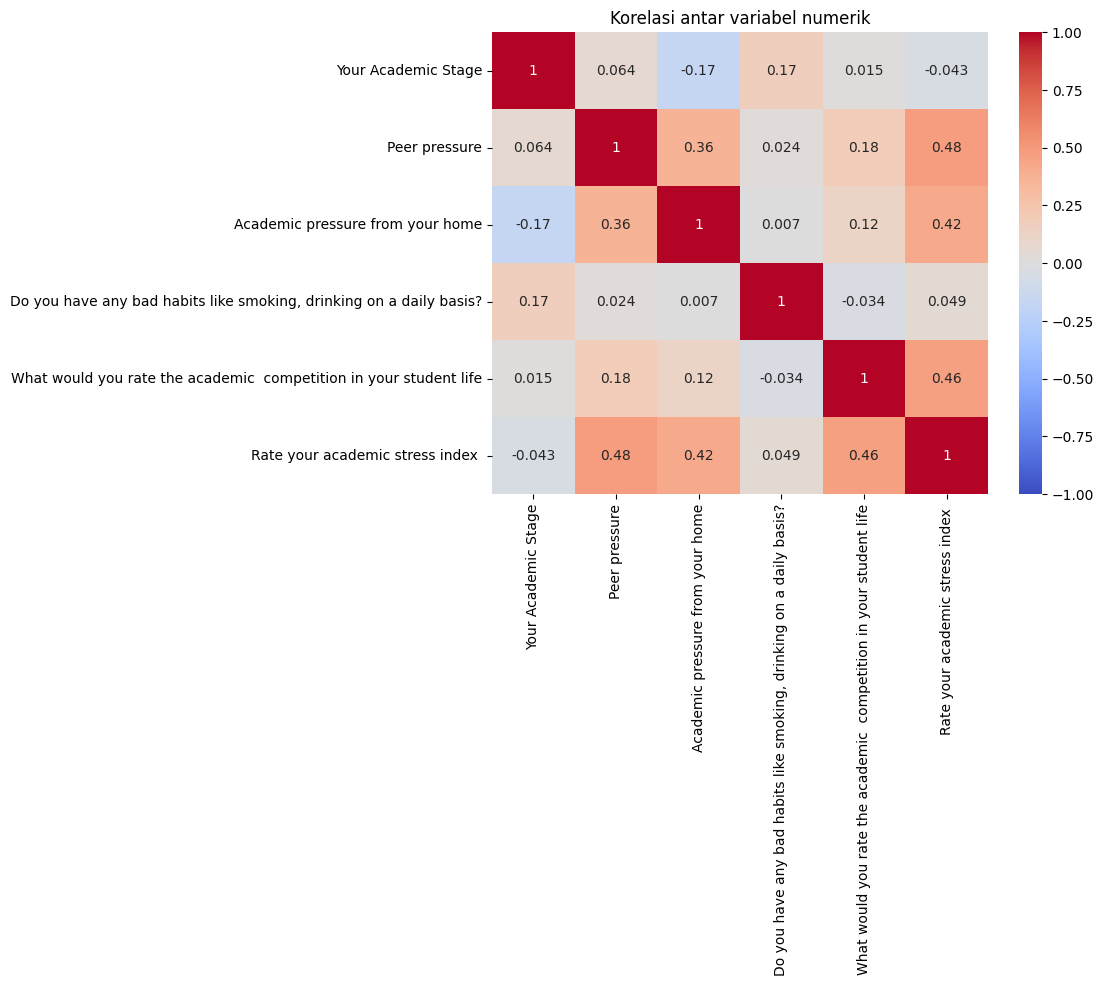

In [ ]:
data_numeric = data.select_dtypes(include=['int64','float64'])

corr = data_numeric.corr(method='pearson')

#tampilkan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi antar variabel numerik")
plt.show()

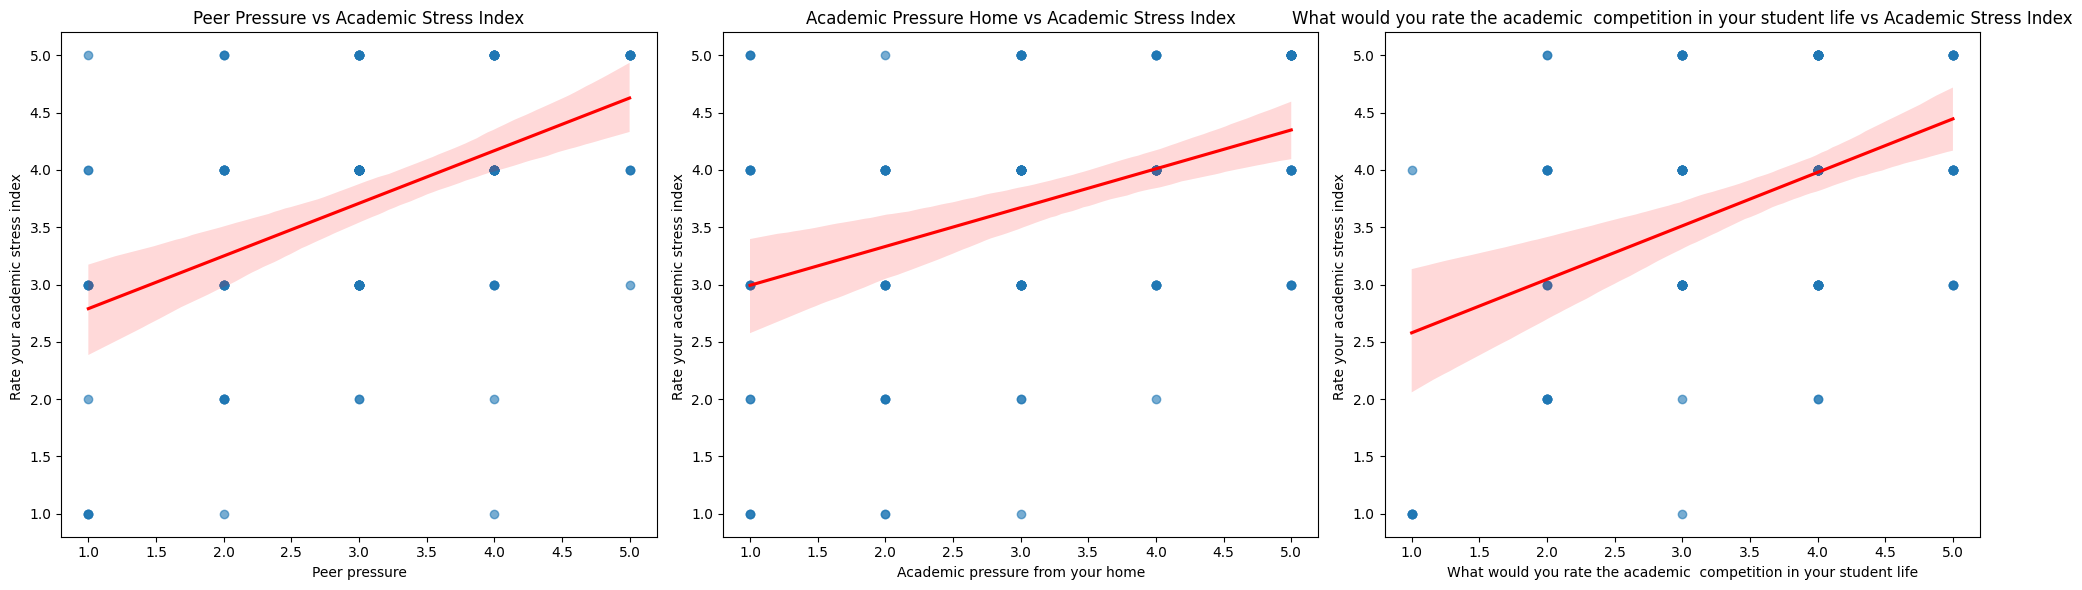

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

# Scatter + Regresi Peer Pressure
plt.subplot(1,3,1)
sns.regplot(x='Peer pressure',
            y='Rate your academic stress index ',
            data=data,
            scatter_kws={'alpha':0.6},
            line_kws={'color':'red'})
plt.title("Peer Pressure vs Academic Stress Index")

# Scatter + Regresi Academic Pressure Home
plt.subplot(1,3,2)
sns.regplot(x='Academic pressure from your home',
            y='Rate your academic stress index ',
            data=data,
            scatter_kws={'alpha':0.6},
            line_kws={'color':'red'})
plt.title("Academic Pressure Home vs Academic Stress Index")

# Scatter + Regresi  'What would you rate the academic  competition in your student life'
plt.subplot(1,3,3)
sns.regplot(x= 'What would you rate the academic  competition in your student life',
            y='Rate your academic stress index ',
            data=data,
            scatter_kws={'alpha':0.6},
            line_kws={'color':'red'})
plt.title('What would you rate the academic  competition in your student life vs Academic Stress Index')

plt.tight_layout()
plt.show()


In [ ]:
# Hitung korelasi Pearson
corr_peer = data['Peer pressure'].corr(data['Rate your academic stress index '])
corr_home = data['Academic pressure from your home'].corr(data['Rate your academic stress index '])
corr_home1 = data['What would you rate the academic  competition in your student life'].corr(data['Rate your academic stress index '])

print("Korelasi Peer Pressure vs Academic Stress Index:", corr_peer)
print("Korelasi Academic Pressure Home vs Academic Stress Index:", corr_home)
print("What would you rate the academic  competition in your student life vs Academic Stress Index:", corr_home1)

Korelasi Peer Pressure vs Academic Stress Index: 0.4794126322221694
Korelasi Academic Pressure Home vs Academic Stress Index: 0.4160748835479595
What would you rate the academic  competition in your student life vs Academic Stress Index: 0.46179144922857307


Correlation Results

    1.Peer Pressure vs Academic Stress Index → 0.47 (moderate positive correlation). This means that the higher the peer pressure, the higher the academic stress levels tend to be.

    2.Academic Pressure from Home vs Academic Stress Index → 0.40 (moderate positive correlation, slightly weaker). Academic pressure from home is also positively associated with stress, but the effect is not as strong as peer pressure.

    3.Academic Competition vs Academic Stress Index → 0.44 (moderate positive correlation). Perceptions of academic competition are positively correlated with higher academic stress.
-----------------------------------------------------------------------------
Interpretation

    1.All three factors (peer pressure, home academic pressure, and academic competition) show a positive relationship with academic stress → as these pressures increase, stress levels also increase.

    2.Among them, peer pressure has the strongest correlation with stress (0.47), followed by academic competition (0.44), and lastly academic pressure from home (0.40).

    3.However, since all values are below 0.7, the correlations are considered moderate rather than strong. This suggests that while these factors do play a role in academic stress, there are likely other significant factors influencing stress levels as well.

#### Boxplot

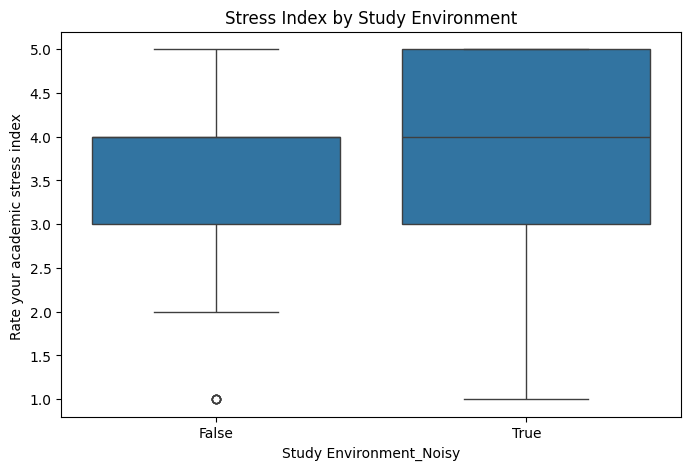

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Study Environment_Noisy', y='Rate your academic stress index ', data=data)
plt.title("Stress Index by Study Environment")
plt.show()

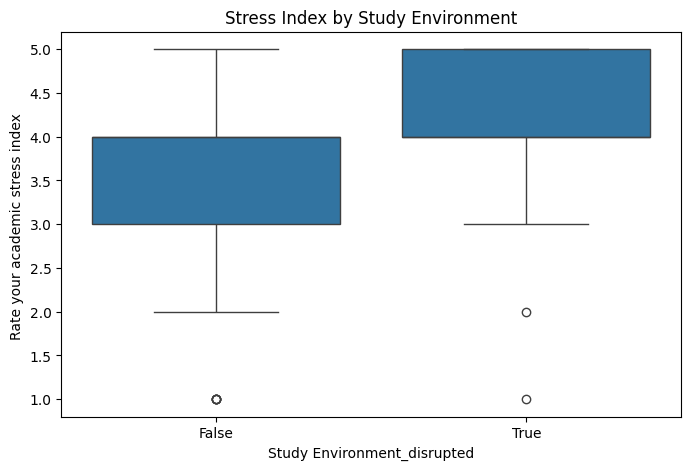

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Study Environment_disrupted', y='Rate your academic stress index ', data=data)
plt.title("Stress Index by Study Environment")
plt.show()

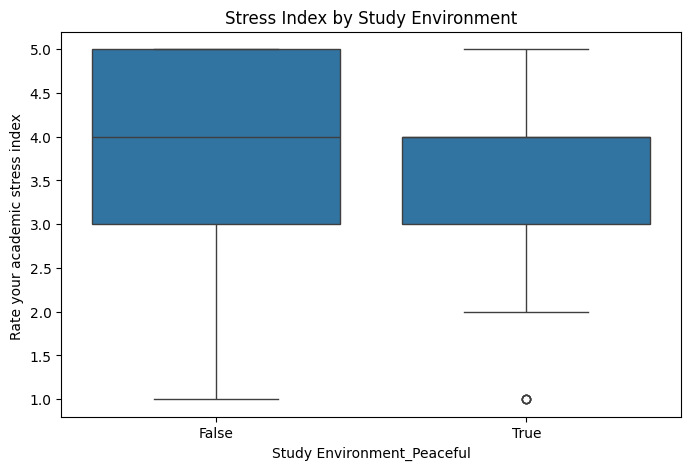

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Study Environment_Peaceful', y='Rate your academic stress index ', data=data)
plt.title("Stress Index by Study Environment")
plt.show()

🔹 Preliminary Conclusion

    1.Students in noisy environments tend to report a higher and more varied stress index.

    2.In quiet environments, the stress index remains relatively stable, typically around 3–4.

    3.A disrupted environment appears to contribute positively to higher stress levels.

    4.In contrast, a peaceful environment is associated with a more stable stress index, also around 3–4.

Research Question:
“Does the study environment affect students’ stress levels?”
Answer:
he findings indicate that students in noisy or disrupted environments are more likely to report higher levels of academic stress compared to those in quiet or peaceful environments.

## Machine Learning


🎯 Tugas 1: Multi-class classification Tingkat Academic Stress Index

Problem: Banyak siswa/mahasiswa mengalami stres, tapi sulit diprediksi siapa yang rentan stres tinggi.

ML Task: Klasifikasi → memprediksi nilai Academic Stress Index (1–5) berdasarkan:

        Peer pressure

        Academic pressure from home

        Study Environment

        Coping strategy

        Bad habits

        Academic competition

Goal: Membuat model yang bisa mengidentifikasi siswa/mahasiswa berisiko stres tinggi, sehingga bisa dilakukan intervensi lebih awal (misalnya konseling).

-------------------------------------------------------------------------------
🎯 Tugas 2: Klasifikasi Tingkat Pendidikan Berdasarkan Faktor Tekanan

Problem: Apakah pola tekanan/stress berbeda signifikan antara SMA, S1, dan S2?

ML Task: Klasifikasi Multikelas → memprediksi Academic Stage (high school / undergraduate / post-graduate) berdasarkan faktor tekanan dan kebiasaan.

Goal: Mengetahui ciri khas tekanan di setiap jenjang → misalnya siswa SMA lebih rentan terhadap academic pressure from home, mahasiswa S1 lebih banyak dipengaruhi peer pressure, dll. Ini bisa dipakai untuk kebijakan kurikulum atau program psikologis berbeda di tiap jenjang.

-------------------------------------------------------------------------------
🎯 Tugas 3: Rekomendasi Coping Strategy

Problem: Banyak mahasiswa salah memilih cara coping → misalnya hanya menangis (emotional breakdown), padahal bisa lebih sehat dengan social support atau problem solving.

ML Task: Rekomendasi (Supervised Classification / Recommender System)

Input: tekanan yang dialami siswa (peer pressure, home pressure, environment, habits, stress level)

Output: coping strategy paling efektif (misalnya “Analyze the situation” atau “Social support”)

Goal: Sistem otomatis untuk merekomendasikan cara mengatasi stres yang lebih sehat bagi siswa/mahasiswa.

# Task 1 - Klasifikasi Academic Stress Index

Model yang akan di gunakan dan dibandingkan :

    1.Logistic Regression (multinomial)

    2.Random Forest Classifier

    3.XGBoost Classifier
    
  

In [ ]:
print(data.columns)

Index(['Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index ', 'Study Environment_Noisy',
       'Study Environment_Peaceful', 'Study Environment_disrupted',
       'What coping strategy you use as a student?_Analyze the situation and handle it with intellect',
       'What coping strategy you use as a student?_Emotional breakdown (crying a lot)',
       'What coping strategy you use as a student?_Social support (friends, family)'],
      dtype='object')


##### Split data dan scaling

In [ ]:

# Target
y = data['Rate your academic stress index ']

# Fitur (jangan drop yang penting)
X = data.drop(columns=['Rate your academic stress index '])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [ ]:
# scaling hanya di train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# apply scaler yang sudah fit ke test
X_test_scaled = scaler.transform(X_test)

### Class distribution

<Axes: xlabel='Rate your academic stress index ', ylabel='count'>

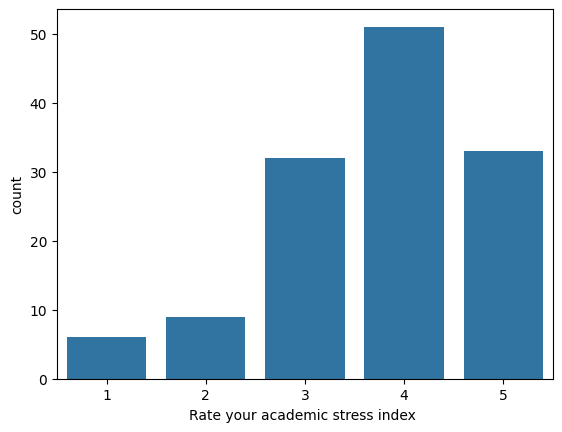

In [ ]:
sns.countplot(x="Rate your academic stress index ", data=data)


In [ ]:
print(y.value_counts())
print(y.unique())


Rate your academic stress index 
4    51
5    33
3    32
2     9
1     6
Name: count, dtype: int64
[5 3 4 2 1]


## Build Model with Imbalance Data

In [ ]:
models = {
    "Logistic Regression": lambda: LogisticRegression(
        multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42
    ),
    "Decision Tree": lambda: DecisionTreeClassifier(random_state=42),
    "Random Forest": lambda: RandomForestClassifier(random_state=42),
    "SVM": lambda: SVC(probability=True, random_state=42),
    "Gradient Boosting": lambda: GradientBoostingClassifier(random_state=42),
}

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [3, 5, 10, None]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]},
}



Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

Best hyperparameters: {'C': 0.1}
Training Accuracy: 0.5299145299145299
Test Accuracy: 0.35714285714285715

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.36      0.80      0.50         5
           5       0.50      0.25      0.33         4

    accuracy                           0.36        14
   macro avg       0.17      0.21      0.17        14
weighted avg       0.27      0.36      0.27        14



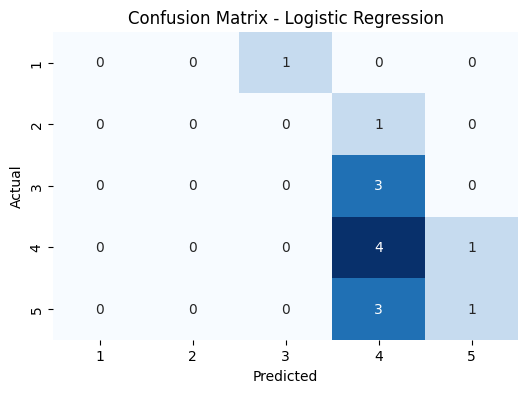

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Decision Tree
Best hyperparameters: {'max_depth': 3}
Training Accuracy: 0.5470085470085471
Test Accuracy: 0.42857142857142855

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.40      0.80      0.53         5
           5       0.33      0.25      0.29         4

    accuracy                           0.43        14
   macro avg       0.35      0.41      0.36        14
weighted avg       0.31      0.43      0.34        14



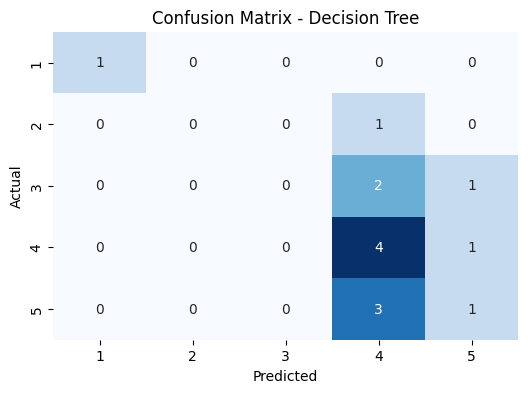

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest
Best hyperparameters: {'max_depth': 5, 'n_estimators': 50}
Training Accuracy: 0.8290598290598291
Test Accuracy: 0.21428571428571427

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.14      0.20      0.17         5
           5       0.50      0.25      0.33         4

    accuracy                           0.21        14
   macro avg       0.33      0.29      0.30        14
weighted avg       0.27      0.21      0.23        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


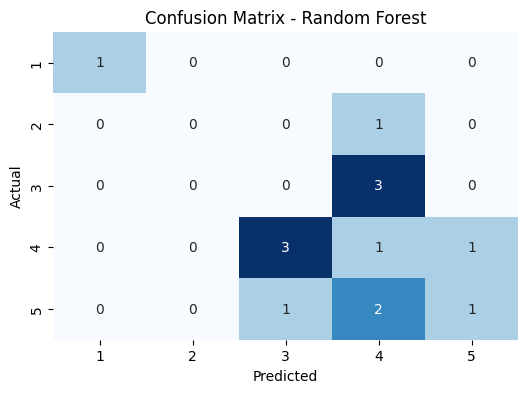


SVM


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best hyperparameters: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 0.7094017094017094
Test Accuracy: 0.14285714285714285

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.20      0.20      0.20         5
           5       0.33      0.25      0.29         4

    accuracy                           0.14        14
   macro avg       0.11      0.09      0.10        14
weighted avg       0.17      0.14      0.15        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


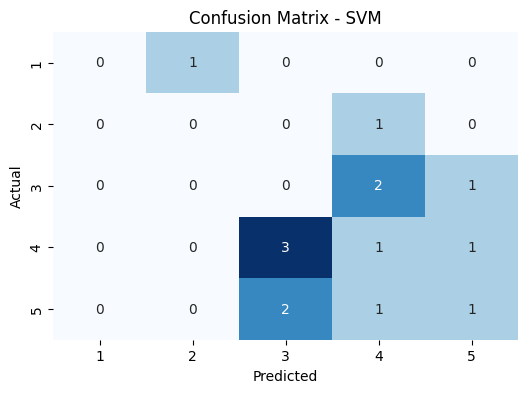


Gradient Boosting


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Training Accuracy: 0.8034188034188035
Test Accuracy: 0.21428571428571427

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.50      0.25      0.33         4

    accuracy                           0.21        14
   macro avg       0.50      0.45      0.47        14
weighted avg       0.29      0.21      0.24        14



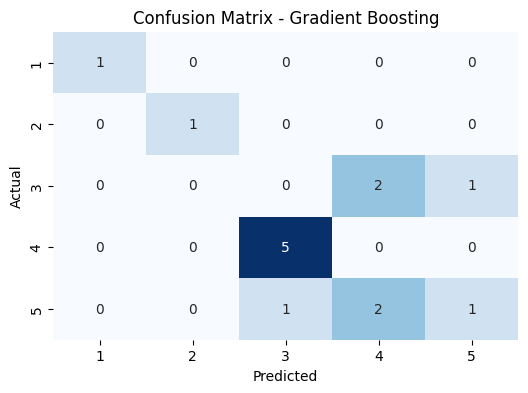


📊 Ringkasan semua model (urut berdasarkan Test Accuracy):
                 Model                               Best Parameters  \
1        Decision Tree                              {'max_depth': 3}   
0  Logistic Regression                                    {'C': 0.1}   
2        Random Forest          {'max_depth': 5, 'n_estimators': 50}   
4    Gradient Boosting  {'learning_rate': 0.01, 'n_estimators': 200}   
3                  SVM                    {'C': 10, 'kernel': 'rbf'}   

   Train Accuracy  Test Accuracy  F1-Score  Precision    Recall  
1        0.547009       0.428571  0.343537   0.309524  0.428571  
0        0.529915       0.357143  0.273810   0.272727  0.357143  
2        0.829060       0.214286  0.226190   0.265306  0.214286  
4        0.803419       0.214286  0.238095   0.285714  0.214286  
3        0.709402       0.142857  0.153061   0.166667  0.142857  


In [ ]:
results_list = []

for name, model_func in models.items():
    print(f"\n{name}")

    # Buat instance model
    model = model_func()

    # GridSearchCV jika ada param grid
    if name in param_grids:
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)   # <<< pakai data training
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        print("Best hyperparameters:", best_params)
    else:
        best_model = model
        best_model.fit(X_train, y_train)   # <<< pakai data training
        best_params = None

    # =====================
    # Evaluasi Training
    # =====================
    y_train_pred = best_model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print("Training Accuracy:", train_acc)

    # =====================
    # Evaluasi Test
    # =====================
    y_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_acc)

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred))

    # =====================
    # Confusion Matrix (plot)
    # =====================
    labels = np.unique(y_test)   # ambil label unik dari data
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # =====================
    # Skor evaluasi lainnya
    # =====================
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")

    results_list.append({
        "Model": name,
        "Best Parameters": str(best_params),
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall
    })

# =====================
# Ringkasan semua model
# =====================
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)
print("\n📊 Ringkasan semua model (urut berdasarkan Test Accuracy):")
print(results_df)


## Oversampling Menggunakan ADASYN

In [ ]:
print(y.value_counts(normalize=True))

Rate your academic stress index 
4    0.389313
5    0.251908
3    0.244275
2    0.068702
1    0.045802
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import ADASYN

# =====================
# Oversampling dengan ADASYN
# =====================
adasyn = ADASYN(random_state=42, n_neighbors=3, sampling_strategy="auto")
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

print("Sebelum oversampling:", np.bincount(y_train))
print("Sesudah oversampling:", np.bincount(y_train_res))


Sebelum oversampling: [ 0  5  8 29 46 29]
Sesudah oversampling: [ 0 44 44 50 46 55]


In [ ]:
print("Distribusi kelas training:", y_train_res.value_counts())


Distribusi kelas training: Rate your academic stress index 
5    55
3    50
4    46
2    44
1    44
Name: count, dtype: int64


##  Build Model with balance Data


Logistic Regression


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

Best hyperparameters: {'C': 1}
Training Accuracy: 0.7071129707112971
Test Accuracy: 0.2857142857142857

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.25      0.33      0.29         3
           4       0.33      0.40      0.36         5
           5       0.33      0.25      0.29         4

    accuracy                           0.29        14
   macro avg       0.18      0.20      0.19        14
weighted avg       0.27      0.29      0.27        14



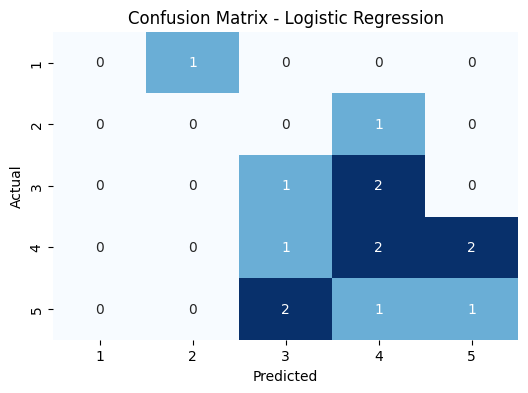

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Decision Tree
Best hyperparameters: {'max_depth': 10}
Training Accuracy: 0.9539748953974896
Test Accuracy: 0.14285714285714285

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.17      0.20      0.18         5
           5       0.00      0.00      0.00         4

    accuracy                           0.14        14
   macro avg       0.23      0.24      0.24        14
weighted avg       0.13      0.14      0.14        14



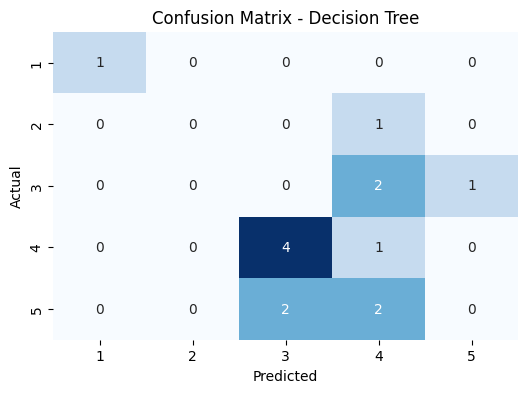

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest
Best hyperparameters: {'max_depth': None, 'n_estimators': 200}
Training Accuracy: 0.9790794979079498
Test Accuracy: 0.07142857142857142

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4

    accuracy                           0.07        14
   macro avg       0.20      0.20      0.20        14
weighted avg       0.07      0.07      0.07        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


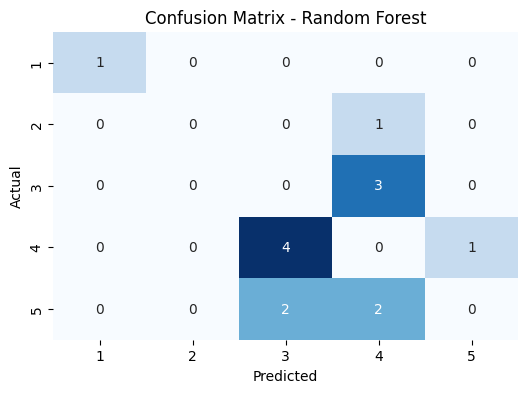

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM
Best hyperparameters: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 0.8451882845188284
Test Accuracy: 0.14285714285714285

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.12      0.33      0.18         3
           4       0.00      0.00      0.00         5
           5       0.33      0.25      0.29         4

    accuracy                           0.14        14
   macro avg       0.09      0.12      0.09        14
weighted avg       0.12      0.14      0.12        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


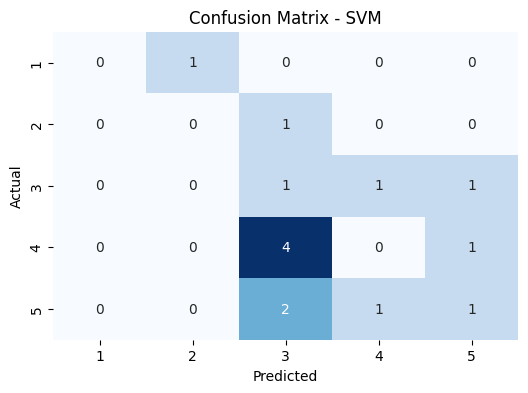


Gradient Boosting


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Training Accuracy: 0.9707112970711297
Test Accuracy: 0.07142857142857142

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4

    accuracy                           0.07        14
   macro avg       0.20      0.20      0.20        14
weighted avg       0.07      0.07      0.07        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


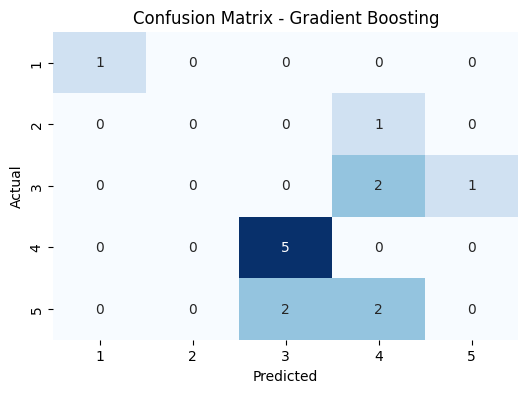


📊 Ringkasan semua model (urut berdasarkan Test Accuracy):
                 Model                              Best Parameters  \
0  Logistic Regression                                     {'C': 1}   
1        Decision Tree                            {'max_depth': 10}   
3                  SVM                   {'C': 10, 'kernel': 'rbf'}   
2        Random Forest     {'max_depth': None, 'n_estimators': 200}   
4    Gradient Boosting  {'learning_rate': 0.1, 'n_estimators': 100}   

   Train Accuracy  Test Accuracy  F1-Score  Precision    Recall  
0        0.707113       0.285714  0.272727   0.267857  0.285714  
1        0.953975       0.142857  0.136364   0.130952  0.142857  
3        0.845188       0.142857  0.120594   0.122024  0.142857  
2        0.979079       0.071429  0.071429   0.071429  0.071429  
4        0.970711       0.071429  0.071429   0.071429  0.071429  


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results_list = []

for name, model_func in models.items():
    print(f"\n{name}")

    # Buat instance model
    model = model_func()

    # GridSearchCV jika ada param grid
    if name in param_grids:
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_train_res, y_train_res)   # <<< pakai data training
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        print("Best hyperparameters:", best_params)
    else:
        best_model = model
        best_model.fit(X_train_res, y_train_res)   # <<< pakai data training
        best_params = None

    # =====================
    # Evaluasi Training
    # =====================
    y_train_pred = best_model.predict(X_train_res)
    train_acc = accuracy_score(y_train_res, y_train_pred)
    print("Training Accuracy:", train_acc)

    # =====================
    # Evaluasi Test
    # =====================
    y_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_acc)

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred))

    # =====================
    # Confusion Matrix (plot)
    # =====================
    labels = np.unique(y_test)   # ambil label unik dari data
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # =====================
    # Skor evaluasi lainnya
    # =====================
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")

    results_list.append({
        "Model": name,
        "Best Parameters": str(best_params),
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall
    })

# =====================
# Ringkasan semua model
# =====================
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)
print("\n📊 Ringkasan semua model (urut berdasarkan Test Accuracy):")
print(results_df)


## Oversampling with Smote

In [ ]:

# =====================
# Oversampling dengan SMOTE
# =====================
smote = SMOTE(random_state=42, k_neighbors=3, sampling_strategy="auto")
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Sebelum oversampling:", np.bincount(y_train))
print("Sesudah oversampling:", np.bincount(y_train_smote))


Sebelum oversampling: [ 0  5  8 29 46 29]
Sesudah oversampling: [ 0 46 46 46 46 46]



Logistic Regression
Best hyperparameters: {'C': 1}
Training Accuracy: 0.7043478260869566
Test Accuracy: 0.21428571428571427

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.33      0.40      0.36         5
           5       0.33      0.25      0.29         4

    accuracy                           0.21        14
   macro avg       0.13      0.13      0.13        14
weighted avg       0.21      0.21      0.21        14



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: 

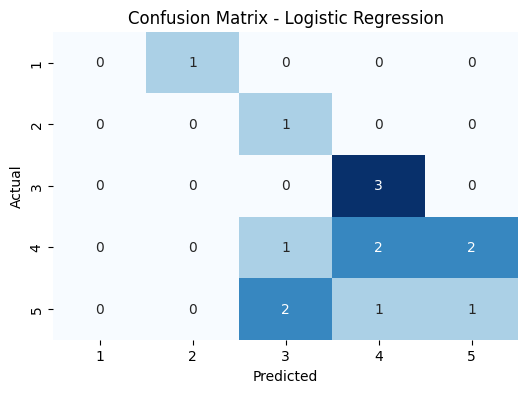

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Decision Tree
Best hyperparameters: {'max_depth': None}
Training Accuracy: 0.9826086956521739
Test Accuracy: 0.2857142857142857

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         3
           4       0.33      0.40      0.36         5
           5       0.00      0.00      0.00         4

    accuracy                           0.29        14
   macro avg       0.47      0.48      0.47        14
weighted avg       0.26      0.29      0.27        14



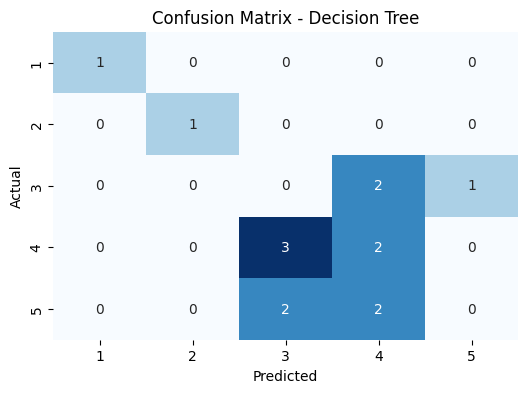


Random Forest
Best hyperparameters: {'max_depth': None, 'n_estimators': 200}
Training Accuracy: 0.9826086956521739
Test Accuracy: 0.07142857142857142

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4

    accuracy                           0.07        14
   macro avg       0.20      0.20      0.20        14
weighted avg       0.07      0.07      0.07        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


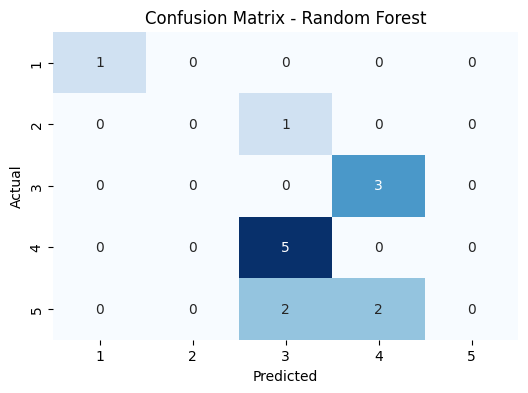


SVM


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best hyperparameters: {'C': 1, 'kernel': 'linear'}
Training Accuracy: 0.7391304347826086
Test Accuracy: 0.21428571428571427

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.33      0.40      0.36         5
           5       0.50      0.25      0.33         4

    accuracy                           0.21        14
   macro avg       0.17      0.13      0.14        14
weighted avg       0.26      0.21      0.23        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


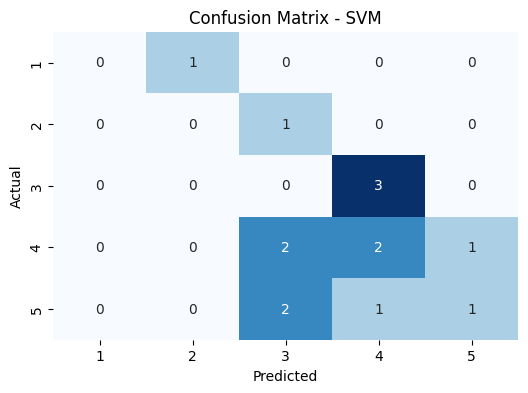


Gradient Boosting


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Training Accuracy: 0.9391304347826087
Test Accuracy: 0.14285714285714285

Classification Report (Test):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.50      0.25      0.33         4

    accuracy                           0.14        14
   macro avg       0.30      0.25      0.27        14
weighted avg       0.21      0.14      0.17        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


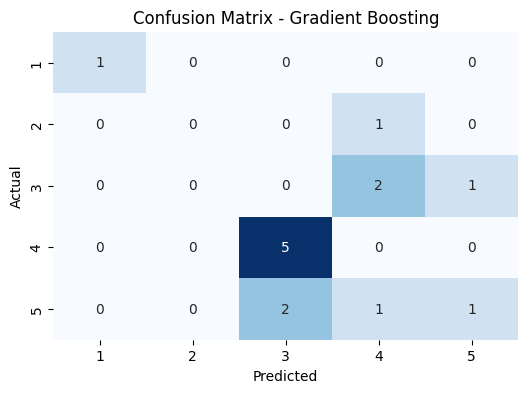


📊 Ringkasan semua model (urut berdasarkan Test Accuracy):
                 Model                             Best Parameters  \
1        Decision Tree                         {'max_depth': None}   
0  Logistic Regression                                    {'C': 1}   
3                  SVM                {'C': 1, 'kernel': 'linear'}   
4    Gradient Boosting  {'learning_rate': 0.1, 'n_estimators': 50}   
2        Random Forest    {'max_depth': None, 'n_estimators': 200}   

   Train Accuracy  Test Accuracy  F1-Score  Precision    Recall  
1        0.982609       0.285714  0.272727   0.261905  0.285714  
0        0.704348       0.214286  0.211503   0.214286  0.214286  
3        0.739130       0.214286  0.225108   0.261905  0.214286  
4        0.939130       0.142857  0.166667   0.214286  0.142857  
2        0.982609       0.071429  0.071429   0.071429  0.071429  


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
results_list = []

for name, model_func in models.items():
    print(f"\n{name}")

    # Buat instance model
    model = model_func()

    # GridSearchCV jika ada param grid
    if name in param_grids:
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_train_smote, y_train_smote)   # <<< pakai data training
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        print("Best hyperparameters:", best_params)
    else:
        best_model = model
        best_model.fit(X_train_smote, y_train_smote)   # <<< pakai data training
        best_params = None

    # =====================
    # Evaluasi Training
    # =====================
    y_train_pred = best_model.predict(X_train_smote)
    train_acc = accuracy_score(y_train_smote, y_train_pred)
    print("Training Accuracy:", train_acc)

    # =====================
    # Prediksi & evaluasi (Test)
    # =====================
    y_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_acc)

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred))

    # =====================
    # Confusion Matrix (plot)
    # =====================
    labels = np.unique(y_test)   # ambil label unik dari data
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # =====================
    # Skor evaluasi lainnya
    # =====================
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")

    results_list.append({
        "Model": name,
        "Best Parameters": str(best_params),
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall
    })

# =====================
# Ringkasan semua model
# =====================
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)
print("\n📊 Ringkasan semua model (urut berdasarkan Test Accuracy):")
print(results_df)


## Visualisasi

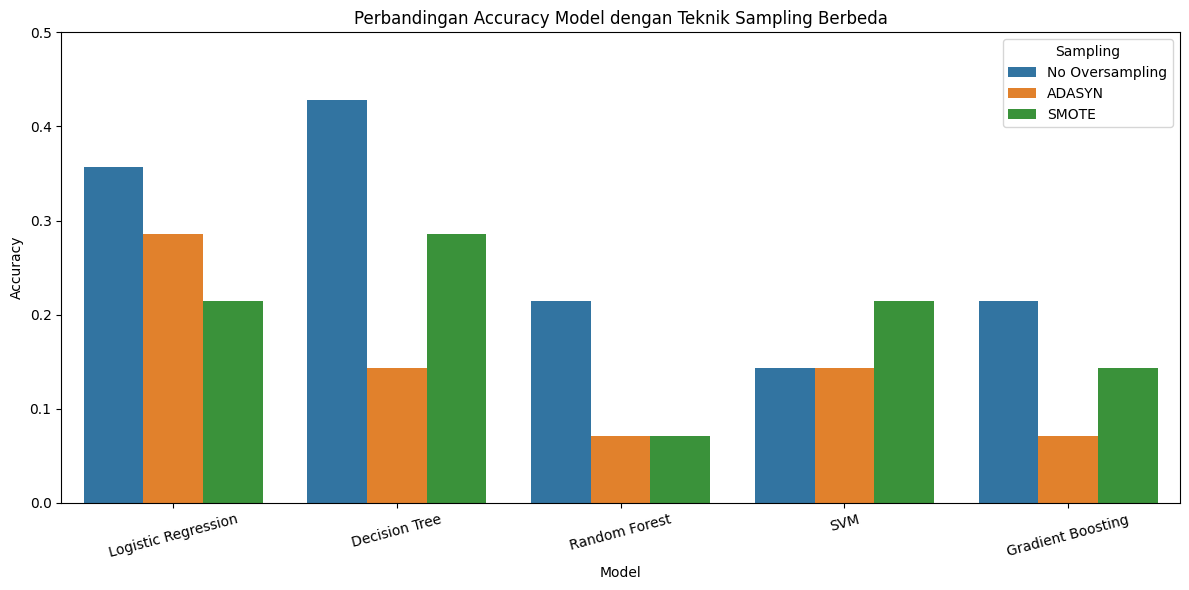

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data dari ketiga kondisi (tanpa oversampling, ADASYN, SMOTE)
no_oversampling = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [0.357143, 0.428571, 0.214286, 0.142857, 0.214286],
    'F1-Score': [0.273810, 0.343537, 0.226190, 0.153061, 0.238095],
    'Precision': [0.272727, 0.309524, 0.265306, 0.166667, 0.285714],
    'Recall': [0.357143, 0.428571, 0.214286, 0.142857, 0.214286],
    'Sampling': 'No Oversampling'
})

adasyn = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [0.285714, 0.142857, 0.071429, 0.142857, 0.071429],
    'F1-Score': [0.272727, 0.136364, 0.071429, 0.120594, 0.071429],
    'Precision': [0.267857, 0.130952, 0.071429, 0.122024, 0.071429],
    'Recall': [0.285714, 0.142857, 0.071429, 0.142857, 0.071429],
    'Sampling': 'ADASYN'
})

smote = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [0.214286, 0.285714, 0.071429, 0.214286, 0.142857],
    'F1-Score': [0.211503, 0.272727, 0.071429, 0.225108, 0.166667],
    'Precision': [0.214286, 0.261905, 0.071429, 0.261905, 0.214286],
    'Recall': [0.214286, 0.285714, 0.071429, 0.214286, 0.142857],
    'Sampling': 'SMOTE'
})

# Gabungkan semua data
df_all = pd.concat([no_oversampling, adasyn, smote], ignore_index=True)

# Plot Accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=df_all, x='Model', y='Accuracy', hue='Sampling')
plt.title('Perbandingan Accuracy Model dengan Teknik Sampling Berbeda')
plt.ylabel('Accuracy')
plt.ylim(0, 0.5)
plt.xticks(rotation=15)
plt.legend(title='Sampling')
plt.tight_layout()
plt.show()



📊 Ringkasan semua model (urut berdasarkan Test Accuracy):
                 Model                             Best Parameters  \
0        Decision Tree                         {'max_depth': None}   
1  Logistic Regression                                    {'C': 1}   
2                  SVM                {'C': 1, 'kernel': 'linear'}   
3    Gradient Boosting  {'learning_rate': 0.1, 'n_estimators': 50}   
4        Random Forest    {'max_depth': None, 'n_estimators': 200}   

   Train Accuracy  Test Accuracy  F1-Score  Precision    Recall  
0        0.982609       0.285714  0.272727   0.261905  0.285714  
1        0.704348       0.214286  0.211503   0.214286  0.214286  
2        0.739130       0.214286  0.225108   0.261905  0.214286  
3        0.939130       0.142857  0.166667   0.214286  0.142857  
4        0.982609       0.071429  0.071429   0.071429  0.071429  


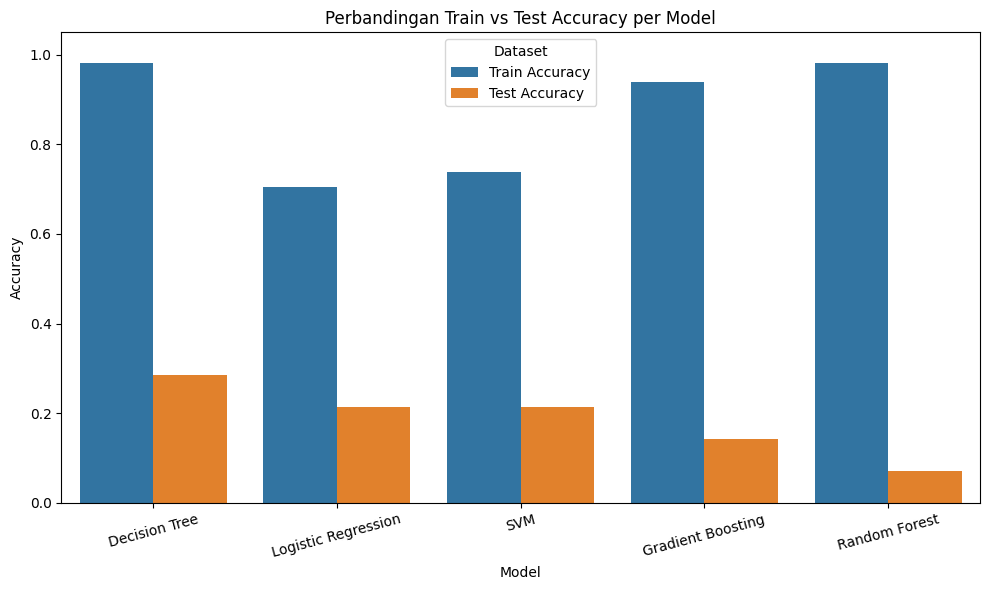

In [ ]:
# Data ringkasan hasil model
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'SVM', 'Gradient Boosting', 'Random Forest'],
    'Best Parameters': [
        "{'max_depth': None}",
        "{'C': 1}",
        "{'C': 1, 'kernel': 'linear'}",
        "{'learning_rate': 0.1, 'n_estimators': 50}",
        "{'max_depth': None, 'n_estimators': 200}"
    ],
    'Train Accuracy': [0.982609, 0.704348, 0.739130, 0.939130, 0.982609],
    'Test Accuracy':  [0.285714, 0.214286, 0.214286, 0.142857, 0.071429],
    'F1-Score':       [0.272727, 0.211503, 0.225108, 0.166667, 0.071429],
    'Precision':      [0.261905, 0.214286, 0.261905, 0.214286, 0.071429],
    'Recall':         [0.285714, 0.214286, 0.214286, 0.142857, 0.071429],
})

# Urutkan berdasarkan Test Accuracy
results_df = results_df.sort_values(by="Test Accuracy", ascending=False)

print("\n📊 Ringkasan semua model (urut berdasarkan Test Accuracy):")
print(results_df)

# =====================
# Plot Train vs Test Accuracy
# =====================
plt.figure(figsize=(10,6))
results_melt = results_df.melt(
    id_vars="Model",
    value_vars=["Train Accuracy", "Test Accuracy"],
    var_name="Data",
    value_name="Accuracy"
)

sns.barplot(data=results_melt, x="Model", y="Accuracy", hue="Data")
plt.title("Perbandingan Train vs Test Accuracy per Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(rotation=15)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


## Kesimpulan
Visualisasi ini menunjukkan perbandingan akurasi lima model menggunakan tiga teknik sampling: tanpa oversampling, ADASYN, dan SMOTE. Dari grafik terlihat bahwa Decision Tree tanpa oversampling memberikan akurasi tertinggi (43%), disusul Logistic Regression. Sebaliknya, model seperti Random Forest dan Gradient Boosting mengalami penurunan kinerja saat menggunakan ADASYN dan SMOTE. Hal ini kemungkinan besar disebabkan oleh ketidakseimbangan kelas yang ekstrem, di mana jumlah data minoritas terlalu sedikit. Teknik oversampling seperti ADASYN dan SMOTE memerlukan cukup data minoritas untuk mensintesis sampel baru secara representatif — jika datanya terlalu sedikit, hasil sintesis bisa menjadi noise atau tidak mencerminkan pola sebenarnya, yang akhirnya menurunkan performa model.

In [ ]:

# Buat tabel summary
detailed_summary = []

for name, model_fn in models.items():
    model = model_fn()
    params = param_grids.get(name, {})
    param_names = list(params.keys())
    param_values = [str(v) for v in params.values()]
    num_combinations = len(list(itertools.product(*params.values()))) if params else 0

    detailed_summary.append({
        "Model": name,
        "Estimator": type(model).__name__,
        "Tuned": bool(params),
        "Num Parameters": len(param_names),
        "Parameter Names": ', '.join(param_names) if param_names else "-",
        "Parameter Values": ', '.join(param_values) if param_values else "-",
        "Hyperparam Combos": num_combinations
    })

# Convert ke DataFrame
detailed_df = pd.DataFrame(detailed_summary)

# Tampilkan
pd.set_option('display.max_colwidth', None)
print(detailed_df)

                 Model                   Estimator  Tuned  Num Parameters  \
0  Logistic Regression          LogisticRegression   True               1   
1        Decision Tree      DecisionTreeClassifier   True               1   
2        Random Forest      RandomForestClassifier   True               2   
3                  SVM                         SVC   True               2   
4    Gradient Boosting  GradientBoostingClassifier   True               2   

               Parameter Names                  Parameter Values  \
0                            C                [0.01, 0.1, 1, 10]   
1                    max_depth                  [3, 5, 10, None]   
2      n_estimators, max_depth     [50, 100, 200], [None, 5, 10]   
3                    C, kernel   [0.1, 1, 10], ['linear', 'rbf']   
4  n_estimators, learning_rate  [50, 100, 200], [0.01, 0.1, 0.2]   

   Hyperparam Combos  
0                  4  
1                  4  
2                  9  
3                  6  
4            